## Import Dependencies

In [49]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import metrics for model evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, f1_score, roc_auc_score,
                             classification_report)

## Load Dataset

In [2]:
# import water potability dataset
df = pd.read_csv('water_potability.csv')

In [3]:
# view dataset features
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# view data statistics
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Data Cleansing

In [5]:
# check for null values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
# create a copy of the dataset
df_copy = df

In [7]:
# fill null values with their mean
for i in df.columns:
    df_copy[i].fillna(value=df_copy[i].mean(), inplace=True)

In [8]:
# check for any remaining null values
df_copy.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## EDA

In [10]:
# set our colour palette preference
sns.set_palette("Spectral_r",n_colors=4)

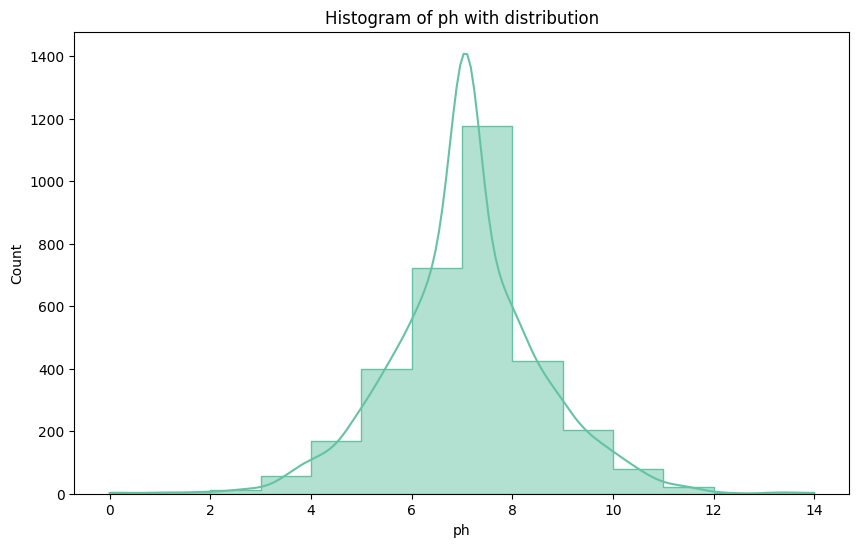

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['ph'], bins=14, element="step", kde=True)
plt.title('Histogram of ph with distribution')
plt.show()

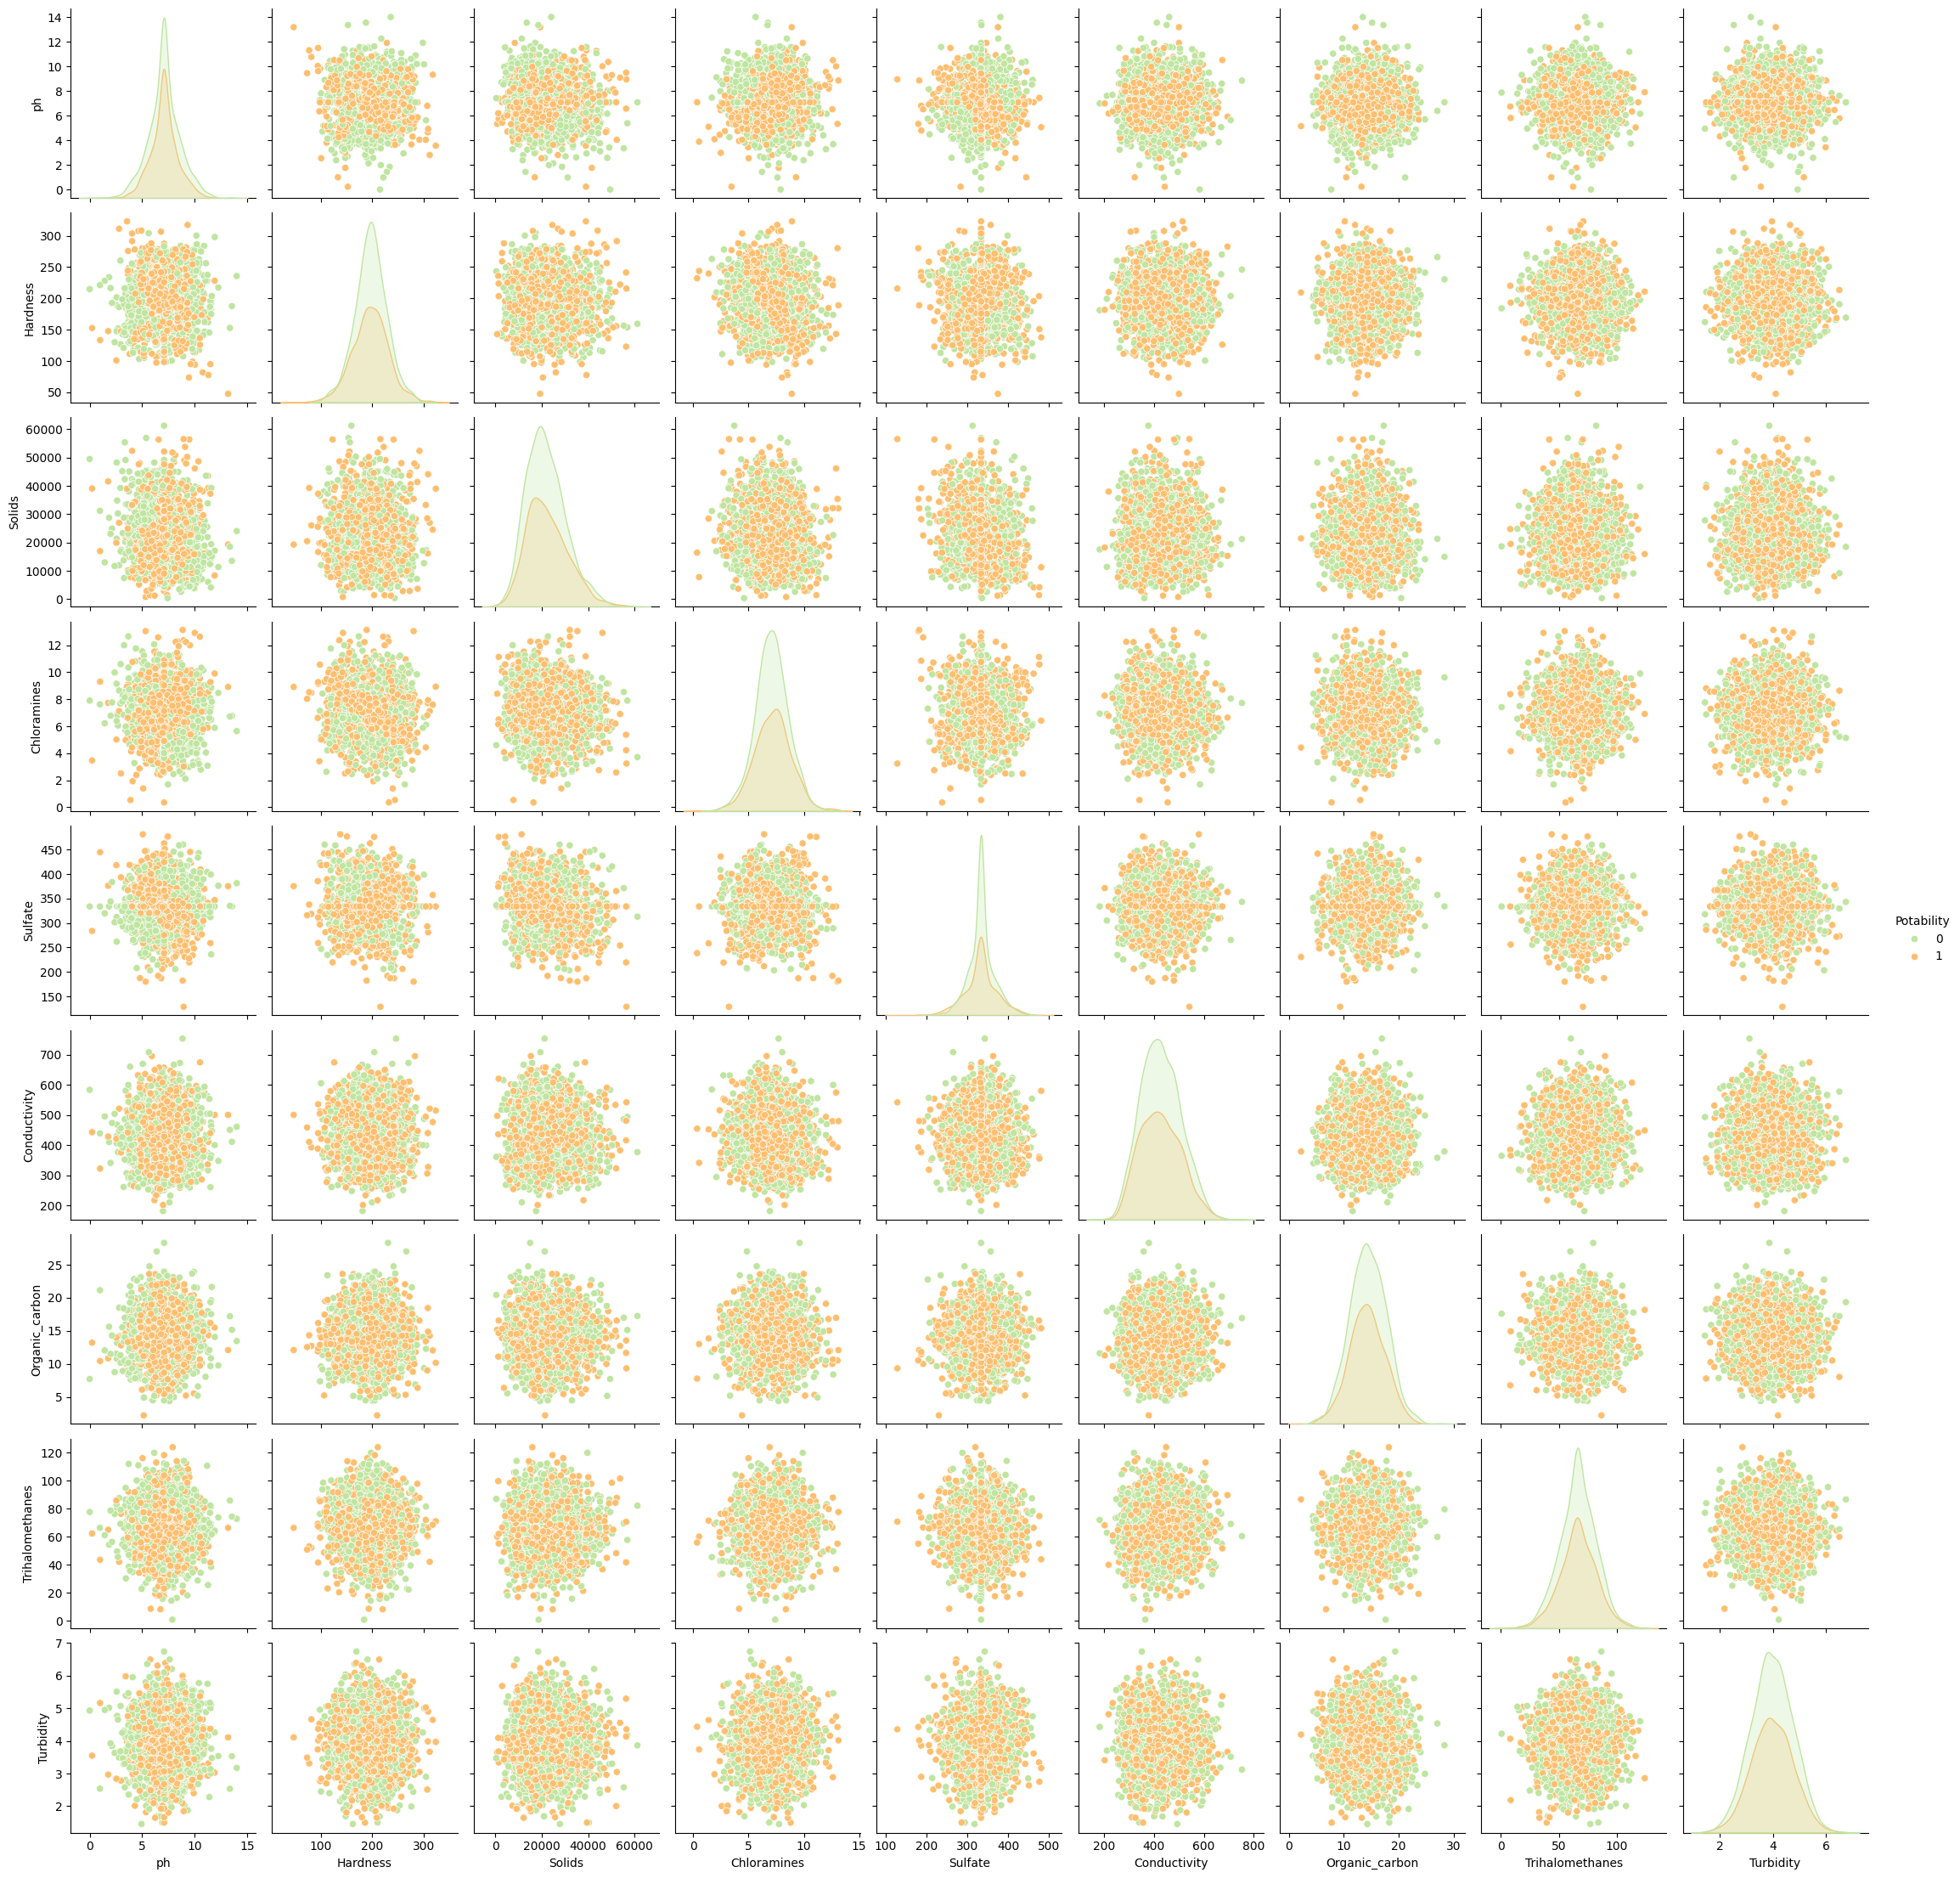

In [24]:
sns.pairplot(df_copy, hue='Potability', palette='Spectral_r')
plt.show()

<Axes: >

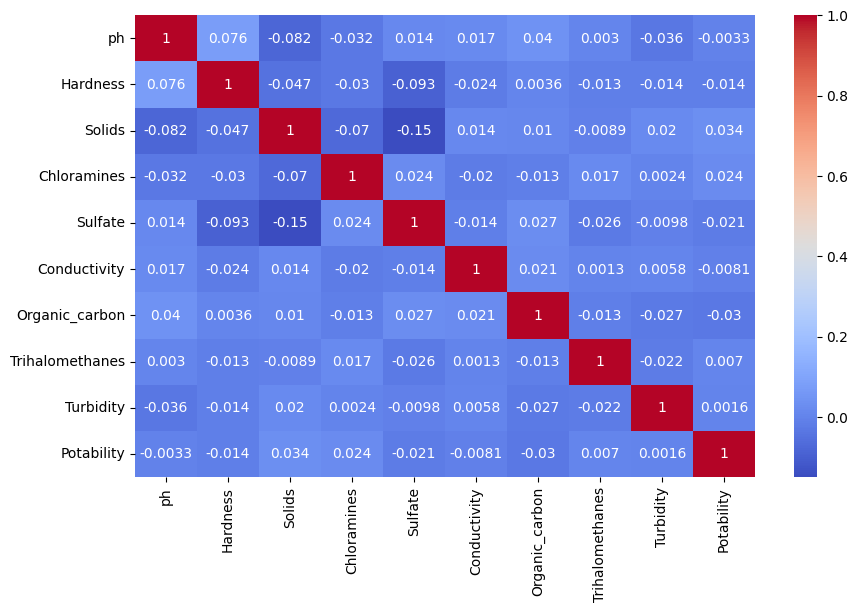

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=True)

## Model Building

In [44]:
X = df_copy.drop('Potability', axis=1)
y = df_copy['Potability']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rf = RandomForestClassifier()

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# obtain predictions using the test dataset
y_pred = rf.predict(X_test)

# print the predictions
print(y_pred)

[0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 

In [55]:
# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [56]:
# Print evaluation metrics
print("The accuracy score is ", accuracy)
print("The precision score is ", precision)
print("The recall score is ", recall)
print("The f1_score is ", f1)

The accuracy score is  0.676829268292683
The precision score is  0.6311475409836066
The recall score is  0.3155737704918033
The f1_score is  0.42076502732240445


In [61]:
label = ['Not Potable', 'Potable']

In [62]:
pd.DataFrame(data=confusion_matrix(y_test, y_pred), index=label, columns=label)

,Not Potable,Potable
Not Potable,367,45
Potable,167,77


In [63]:
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=label))

Classification Report
              precision    recall  f1-score   support

 Not Potable       0.69      0.89      0.78       412
     Potable       0.63      0.32      0.42       244

    accuracy                           0.68       656
   macro avg       0.66      0.60      0.60       656
weighted avg       0.67      0.68      0.64       656



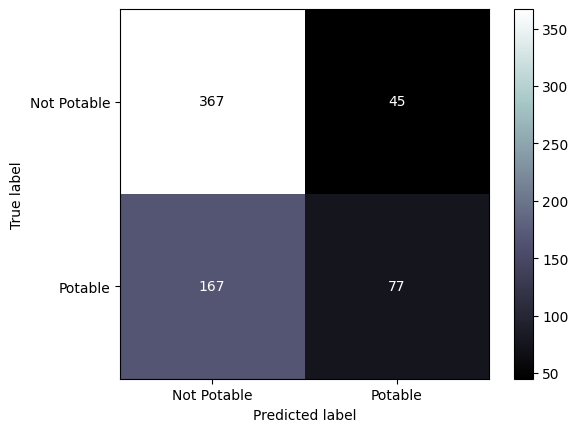

In [64]:
cm_mlp = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=label)
cm_display.plot(cmap='bone')
plt.show()